In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from tqdm.notebook import trange, tqdm
from matplotlib.ticker import FormatStrFormatter
%load_ext autoreload
%autoreload 2


# Direct use of ETC code

## Hypothesis

* **Exposure time** : 3600
* **NDIT** : 1
* **Magnitude** : 20
* **Instrument Efficiency** : 0.084 , ie the number given by the specification (product of max transmission for all relevant subsystems) : 0.3 for spectrograph, 0.7 for front end, 0.4 for the Fiber link
* **Diameter of the spectrograph aperture**: 0.798 arcsec to get a half a square arcsec on sky.

* **RON**: 2.5 e-
* **DARK**: 0.5 e-/pix/hr
* **Focal ratio of the camera :** 1.65

**[R-AND-87] Limiting magnitude**

The instrument shall provide a SNR=10 per spectral resolution element on the extracted spectrum at R=100,000 for a magnitude AB=20 (goal AB=21) in an exposure time Texp=1hr under median seeing conditions (as specified in AD5) at the reference wavelengths of:
* V=550nm, 
* I=850nm,
* J=1250nm. 
(one for each spectrometer) .

In [2]:
import subprocess
wl = np.linspace(0.36,0.950,50)
SNR = []
npix = []
for l in tqdm(wl):
    a=subprocess.check_output(["python3", "etc_hires_may2021.py", "MA=20", f"WL={l:0.3f}", "EX=3600", "EI=0.084", "DA=0.798", "DP=10", "FA=1.65", "RO=2.5", "DK=0.5"])
    SNR.append(float(str(a).split("\\n")[11].split(":")[1]))
    npix.append(float(str(a).split("\\n")[-4])) 

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'No Binning')

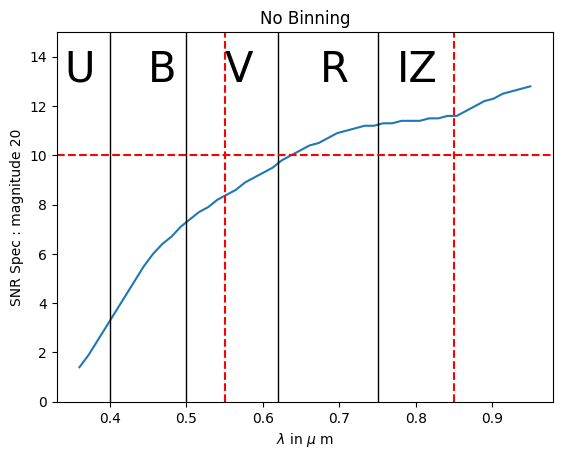

In [3]:
plt.plot(wl,SNR)
plt.axvline(.400,color="k",linewidth = 1)
plt.axvline(0.500,color="k",linewidth = 1)
plt.axvline(.620,color="k",linewidth = 1)
plt.axvline(.750,color="k",linewidth = 1)
plt.axhline(10,color="r",ls="--")
plt.ylim(0,15)
plt.text(0.675,13,"R",size = 30)
plt.text(0.775,13,"IZ",size = 30)
plt.text(0.340,13,"U",size = 30)
plt.text(0.450,13,"B",size = 30)
plt.text(0.550,13,"V",size = 30)
plt.axvline(0.55,color="r",ls="--")
plt.axvline(0.85,color="r",ls="--")
plt.xlabel("$\lambda$ in $\mu$ m")
plt.ylabel("SNR Spec : magnitude 20")
plt.title("No Binning")

In [4]:
SNRb = []
npixb = []
for l in tqdm(wl):
    a=subprocess.check_output(["python3", "etc_hires_may2021.py", "MA=20", f"WL={l:0.3f}", "EX=3600", "EI=0.0833", "DA=0.798", "DP=10", "FA=1.65", "RO=2.5", "DK=0.5", "PB=2"])
    SNRb.append(float(str(a).split("\\n")[11].split(":")[1]))
    npixb.append(float(str(a).split("\\n")[-4])) 

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Binning 2 (for example in the cross dispersion direction)')

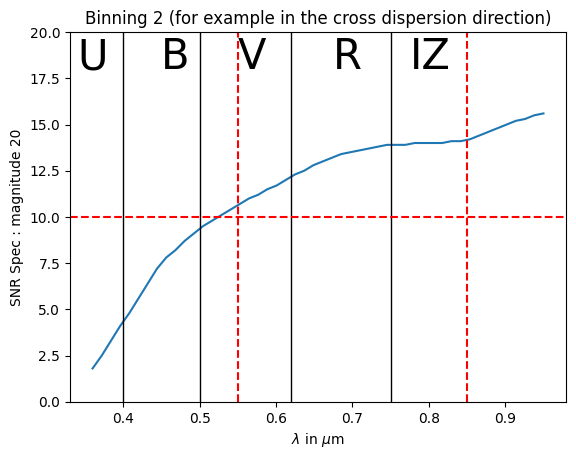

In [5]:
plt.plot(wl,SNRb)
plt.axvline(.400,color="k",linewidth = 1)
plt.axvline(0.500,color="k",linewidth = 1)
plt.axvline(.620,color="k",linewidth = 1)
plt.axvline(.750,color="k",linewidth = 1)
plt.axhline(10,color="r",ls="--")
plt.ylim(0,20)
plt.text(0.675,18,"R",size = 30)
plt.text(0.775,18,"IZ",size = 30)
plt.text(0.340,18,"U",size = 30)
plt.text(0.450,18,"B",size = 30)
plt.text(0.550,18,"V",size = 30)
plt.axvline(0.55,color="r",ls="--")
plt.axvline(0.85,color="r",ls="--")
plt.xlabel("$\lambda$ in $\mu$m")
plt.ylabel("SNR Spec : magnitude 20")
plt.title("Binning 2 (for example in the cross dispersion direction)")

## Check that the number of pixels is ok

4 pixels sampling in both direction, 31 fibers for the star : 496 pixels per resolution elements

Text(0.5, 1.0, 'Number of pixel per resolution element')

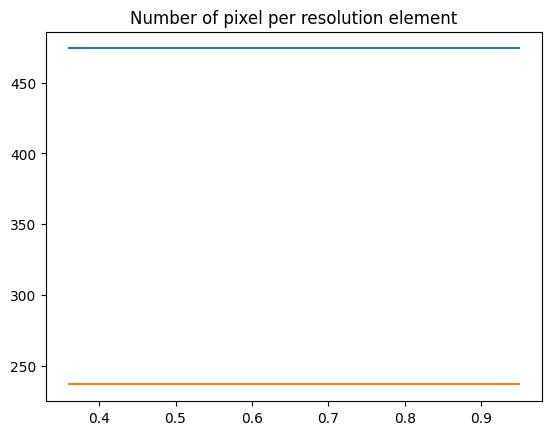

In [6]:
plt.plot(wl,npix)
plt.plot(wl,npixb)
plt.title("Number of pixel per resolution element")

In [7]:
a=subprocess.check_output(["python3", "etc_hires_may2021.py", "MA=20", f"WL=0.700", "EX=3600", "EI=0.084", "DA=0.798", "DP=10", "FA=1.65", "RO=2.5", "DK=0.5"])
print(a.decode())

VNOISEDET : 56.58740972523719
SIGMASKY : 1.9498445997580476e-07
SIGMATH : 3.468044290033951e-11
EFFTEL : 0.6640499999999999
EFFTELTOT : 0.65130024
VNOISEBCK : 14.356410977781533
SLE : 0.6039224999999999
EFF : 0.05470922016
VNOBJ : 701.2922786106008
VNOISEBCK : 14.356410977781533
VNOISEDET : 56.58740972523719
S/N ratio:           10.9
Noise contribution from detector (RON+dark):  77.9 %
Noise contribution from background (sky+thermal):   5.0 %
Noise contribution from photon noise of object:  17.1 %
      0.80
      0.66
      0.98
      21.1
     0.604
      10.0
     474.0
       2.5
       0.5



# Improved code with more details

In [8]:
from SNR_Computations import ANDES, RIZ, UBV, Instrument

In [9]:
andesRIZ = ANDES(DAPE = 0.798 , EXPTIME = 3600, VMAG = 20, RON = 2.5, DARKCUR = 0.5,FCAM = 1.65,DPIX = 10)
andesUBV = ANDES(SPECTRO = 'UBV', DAPE = 0.798 , EXPTIME = 3600, VMAG = 20, RON = 2.5, DARKCUR = 0.5,FCAM = 1.65,DPIX = 10)
andes250 = ANDES(DAPE = 0.798 , EXPTIME = 3600, VMAG = 20, RON = 2.5, DARKCUR = 1,FCAM = 1.65,DPIX = 10*9/8,QE_data = "CCD_250-82.dat")
andes261 = ANDES(DAPE = 0.798 , EXPTIME = 3600, VMAG = 20, RON = 2.5, DARKCUR = 1,FCAM = 1.65,DPIX = 10*9/8,QE_data = "CCD_261-84.dat")

In [10]:
print(andesRIZ)

ANDES(FCAM=1.65, TBCK=283.0, EBCK=0.2, DTEL=38.5, COBS=0.28, RPOW=100000.0, DAPE=0.798, NDIT=1, DARKCUR=0.5, PIXBINNED=1, DPIX=10, RON=2.5, EXPTIME=3600, WL=-1, SN=-1, VMAG=20, SBMAG=-50, AM=1, ATEL=10728865.637645118, XANPIX=0.36000000000000004, YANPIX=0.36000000000000004, PIXAPE=4.586943440397596, TOTPIXRE=5.0, VNOISEDET=1.0, SKYBCKAM=0, SIGMASKY=0, BBEXP=0, SIGMATH=0, EFFTEL=0, ALPHAP=0, AT=0, EFFTELTOT=0, EFF=0, VNBCK=0, VNOISEBCK=0, SKYBCK=-1, SLE=-1, EFF_FE=0.7, EFF_FL=0.4, EFF_SPE=-1, EFFI=0.08, EFFT=-1, ALPHA=-1, NOISETOT=-1, NOBJ=-1, NBCK=-1, QE_data='E2V_astro_multi2.dat', SPECTRO='RIZ')


In [11]:
andesRIZ.WL = np.array([0.7])
andesRIZ.GetPhotons()*andesRIZ.EFFI

array([218.05610881])

Text(0.5, 1.0, 'SNR No Binning')

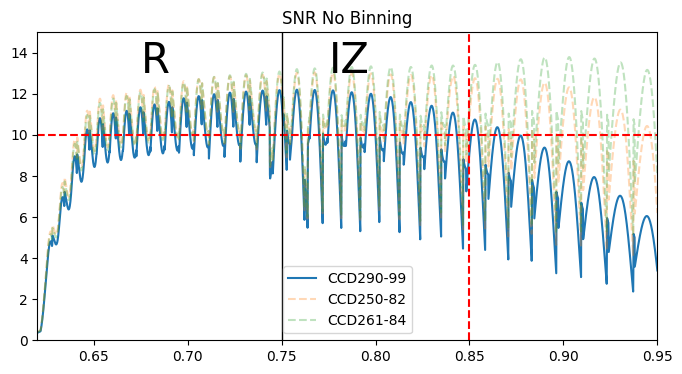

In [12]:
plt.figure(figsize=(8,4))
andesRIZ.WL = np.linspace(0.620,0.950,3000)
andesUBV.WL = np.linspace(0.350,0.630,3000)
andes250.WL = np.linspace(0.620,0.950,3000)
andes261.WL = np.linspace(0.620,0.950,3000)

SN_new = andesRIZ.GetSNSpectro()
SN_UBV = andesUBV.GetSNSpectro()
SN_new250 = andes250.GetSNSpectro()
SN_new261 = andes261.GetSNSpectro()

plt.plot(andesRIZ.WL,SN_new,label = "CCD290-99")
plt.plot(andesRIZ.WL,SN_new250,"--",alpha = 0.3,label = "CCD250-82")
plt.plot(andesRIZ.WL,SN_new261,"--",alpha = 0.3,label = "CCD261-84")
plt.plot()
#plt.plot(wl,SNR)
plt.text(0.675,13,"R",size = 30)
plt.text(0.775,13,"IZ",size = 30)
plt.axvline(0.55,color="r",ls="--")
plt.axvline(0.85,color="r",ls="--")
plt.axhline(10,color="r",ls="--")
plt.axvline(.750,color="k",linewidth = 1)
plt.xlim(0.62,0.950)
plt.ylim(0,15)
plt.legend()
plt.title("SNR No Binning")

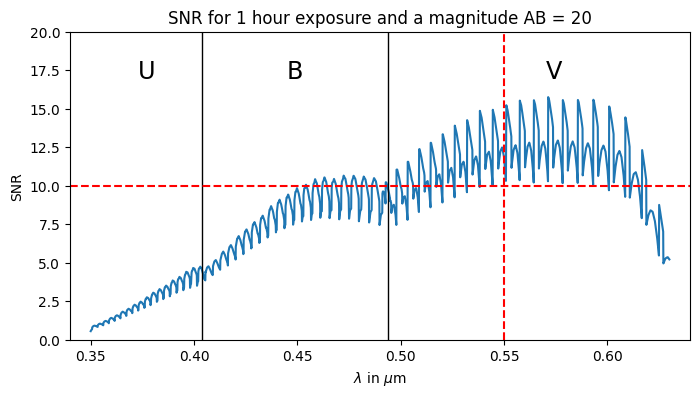

In [40]:
plt.figure(figsize=(8,4))
plt.plot(andesUBV.WL,SN_UBV,label = "UBV")
plt.axvline(0.404, color="k", lw=1)
plt.axvline(0.494, color="k", lw=1)
plt.text(0.377,17,"U",fontsize="xx-large", ha="center")
plt.text(0.449,17,"B",fontsize="xx-large", ha="center")
plt.text(0.574,17,"V",fontsize="xx-large", ha="center")
plt.axhline(10,color="r",ls="--")
plt.axvline(.550,color="r",ls="--")
plt.xlim(0.34,0.640)
plt.ylim(0,20)
plt.xlabel("$\lambda$ in $\mu$m")
plt.ylabel("SNR")
#plt.legend()
plt.title("SNR for 1 hour exposure and a magnitude AB = 20")
plt.savefig("SNR_UBV_mag20_1h.pdf",dpi = 300)

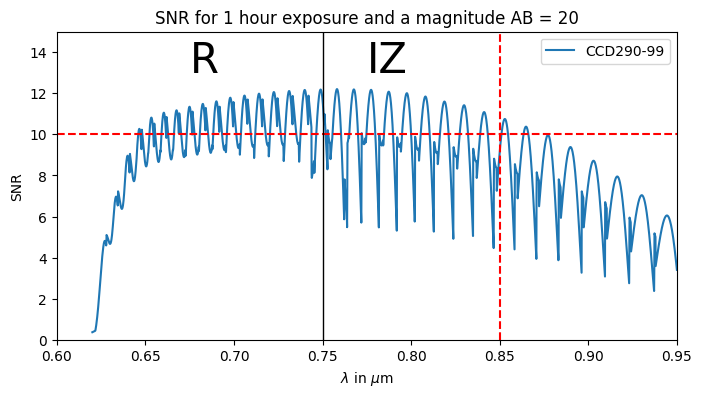

In [35]:
plt.figure(figsize=(8,4))
#plt.plot(andesUBV.WL,SN_UBV,label = "UBV")
plt.plot(andesRIZ.WL,SN_new,label = "CCD290-99")
plt.plot()
#plt.plot(wl,SNR)
plt.text(0.675,13,"R",size = 30)
plt.text(0.775,13,"IZ",size = 30)
#plt.axvline(0.55,color="r",ls="--")
plt.axvline(0.85,color="r",ls="--")
plt.axhline(10,color="r",ls="--")
plt.axvline(.750,color="k",linewidth = 1)
plt.xlim(0.6,0.950)
plt.ylim(0,15)
plt.xlabel("$\lambda$ in $\mu$m")
plt.ylabel("SNR")
plt.legend()
plt.title("SNR for 1 hour exposure and a magnitude AB = 20")
plt.savefig("SNR_RIZ_mag20_1h.png",dpi = 300)

In [20]:
plt.figure(figsize=(8,4))
plt.plot(andesUBV.WL,andesUBV.EFFI*100)
plt.plot(andesRIZ.WL,andesRIZ.EFFI*100)
plt.xlabel("$\lambda$ in $\mu$ m")
plt.ylabel("Andes Transmission in %")
plt.title("ANDES RIZ transmssion")
plt.text(0.675,11,"R",size = 30)
plt.text(0.775,11,"IZ",size = 30)
plt.axvline(.750,color="k",linewidth = 1)
plt.ylim(0,13)
plt.axhline(4,color="r",ls="--")
plt.axhline(7,color="r",ls="--")

In [26]:
plt.figure(figsize=(8,4))
plt.plot(andesUBV.WL,andesUBV.EFFI*100)
plt.xlabel("$\lambda$ in $\mu$ m")
plt.ylabel("Andes Transmission in %")
plt.title("ANDES UBV transmssion")
plt.axvline(0.404, color="r", lw=1)
plt.axvline(0.494, color="r", lw=1)
plt.text(0.377,0.05,"U",fontsize="xx-large", ha="center")
plt.text(0.449,0.05,"B",fontsize="xx-large", ha="center")
plt.text(0.574,0.05,"V",fontsize="xx-large", ha="center")
plt.axvline(.550,color="k",linewidth = 1)
plt.ylim(0,20)
plt.axhline(4,color="r",ls="--")
plt.axhline(7,color="r",ls="--")

In [15]:
plt.plot(andesUBV.WL,andesUBV.GetPhotons()*andesUBV.EFFI)
plt.plot(andesRIZ.WL,andesRIZ.GetPhotons()*andesRIZ.EFFI)
plt.xlabel("$\lambda$ in $\mu$m")
plt.ylabel("electrons")
plt.title("Signal from source")

Text(0.5, 1.0, 'Signal from source')

Text(0, 0.5, 'electrons')

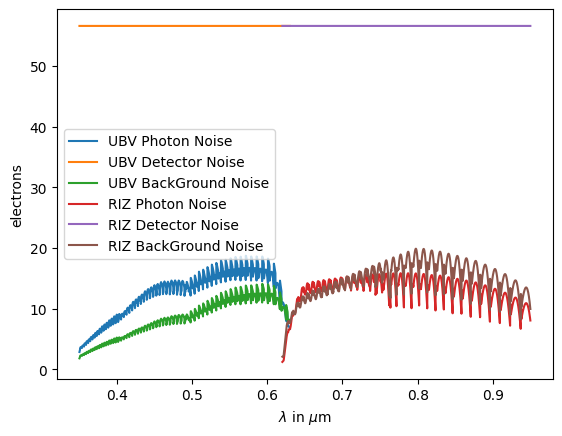

In [16]:
plt.plot(andesUBV.WL,np.sqrt(andesUBV.GetPhotons()*andesUBV.EFFI),label="UBV Photon Noise")
plt.plot(andesUBV.WL,andesUBV.VNOISEDET*np.ones(andesUBV.WL.shape),label = "UBV Detector Noise")
plt.plot(andesUBV.WL,andesUBV.VNOISEBCK*np.ones(andesUBV.WL.shape)*np.sqrt(andesUBV.EFFI),label="UBV BackGround Noise")
plt.plot(andesRIZ.WL,np.sqrt(andesRIZ.GetPhotons()*andesRIZ.EFFI),label="RIZ Photon Noise")
plt.plot(andesRIZ.WL,andesRIZ.VNOISEDET*np.ones(andesRIZ.WL.shape),label = "RIZ Detector Noise")
plt.plot(andesRIZ.WL,andesRIZ.VNOISEBCK*np.ones(andesRIZ.WL.shape)*np.sqrt(andesRIZ.EFFI),label="RIZ BackGround Noise")
plt.legend()
plt.xlabel("$\lambda$ in $\mu$m")
plt.ylabel("electrons")

In [17]:
SN_new_UBV = andesUBV.GetSNSpectro()
SN_new = andesRIZ.GetSNSpectro()
plt.semilogy(andesUBV.WL,0.41*(3e8/andesUBV.RPOW)/(SN_new_UBV*np.sqrt(4)))
plt.semilogy(andesUBV.WL,0.4*np.sqrt(3000)/0.5/SN_new_UBV)
plt.semilogy(andesRIZ.WL,0.41*(3e8/andesRIZ.RPOW)/(SN_new*np.sqrt(4)))
plt.semilogy(andesRIZ.WL,0.4*np.sqrt(3000)/0.5/SN_new)
plt.grid(which = "Minor")
plt.xlabel("$\lambda$ in $\mu$m")
plt.ylabel("RV error in m/s")
plt.title("RV error for emission lines")

Text(0.5, 1.0, 'RV error for emission lines')

In [18]:
C = 0.75
F = 1.657 - 0.2205*C - 0.5007*C**2 
err_v = 1/2*(np.pi*np.log(2))**(-1/4) / SN_new * np.sqrt(3000) * np.sqrt(3e8/100000/4) / C * F / np.sqrt(1000) 

In [19]:
plt.figure(figsize=(8,8))
ax=plt.subplot(111)
plt.semilogy(andesUBV.WL,0.41*(3e8/andesUBV.RPOW)/(SN_new_UBV*np.sqrt(4)),label="UBV 1 Emission line")
plt.axhline(np.mean(err_v[andesUBV.WL>0.35]),c="g",ls="--",label="UBV 1000 Absorption lines")
plt.semilogy(andesUBV.WL,err_v*np.sqrt(1000),label="UBV 1 Absorption line")
#
plt.semilogy(andesRIZ.WL,0.41*(3e8/andesRIZ.RPOW)/(SN_new*np.sqrt(4)),label="RIZ 1 Emission line")
plt.axhline(np.mean(err_v[andesRIZ.WL>0.66]),c="g",ls="--",label="RIZ 1000 Absorption lines")
plt.semilogy(andesRIZ.WL,err_v*np.sqrt(1000),label="RIZ 1 Absorption line")
plt.grid(which = "Minor")
plt.xlabel("$\lambda$ in $\mu$m")
plt.ylabel("RV error in m/s")
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))
plt.legend()
plt.title("RV precision achievable with 1h exposure time for ABmag = 20")

Text(0.5, 1.0, 'RV precision achievable with 1h exposure time for ABmag = 20')